## Image Compression with SVD
___

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

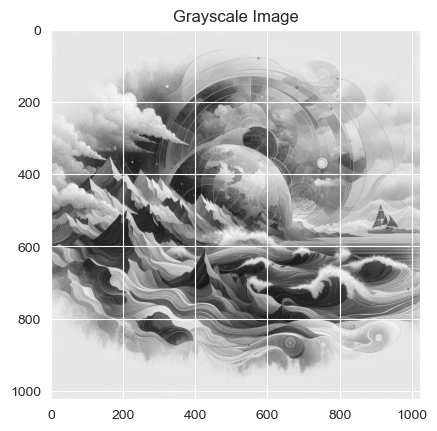

In [6]:
# Step 1: Load the Image
image_path = 'image.png'  # Replace with your image path
image = io.imread(image_path)

# Check if the image has an alpha channel and remove it
if image.shape[2] == 4:
    image = image[..., :3]  # Remove the alpha channel

# Convert to grayscale if the image is in color
if image.ndim == 3:
    image = color.rgb2gray(image)

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

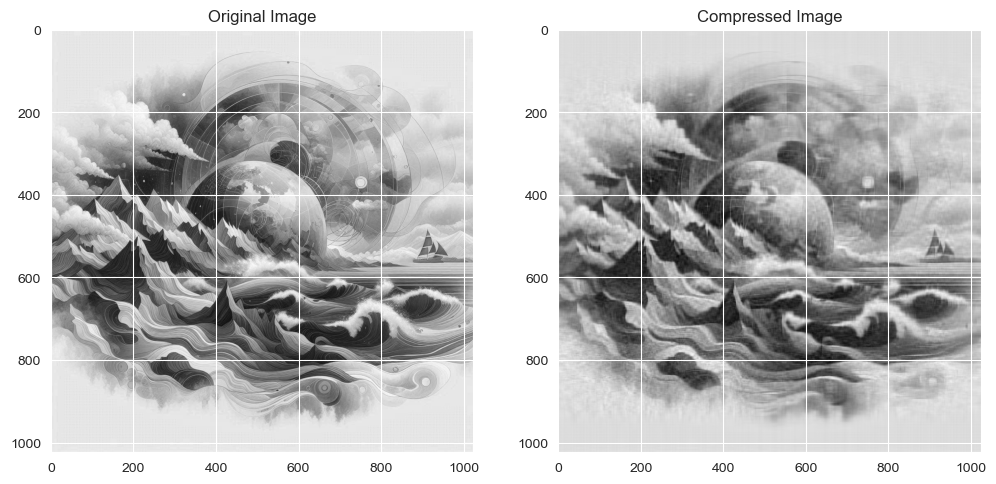

In [10]:
# Step 2: Perform SVD
U, S, Vt = np.linalg.svd(image, full_matrices=False)

# Step 3: Truncate SVD
# Choose the number of singular values to keep (k)
k = 50  # You can adjust this value to see the effect on compression

# Keep only the top-k singular values and corresponding vectors
U_k = U[:, :k]
S_k = np.diag(S[:k])
Vt_k = Vt[:k, :]

# Step 4: Reconstruct the Image
compressed_image = U_k @ S_k @ Vt_k

# Step 5: Display the Results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Compressed Image')
plt.imshow(compressed_image, cmap='gray')

plt.show()
